# Clustering espectral
Es más adecuado de k-means cuando los puntos tienen una distribución aparentemente convexa, donde las distancias euclideas, por ejemplo, no son adecuadas para encontrar la "conexión" entre los puntos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generación de datos de ejemplo
Generamos una distribución en anillo para trabajar con un ejemplo básico

In [2]:
def ring(r_min = 0, r_max = 1, n_samples = 500):
    import numpy.random as rnd
    from math import sin, cos, radians, pi, sqrt
    
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

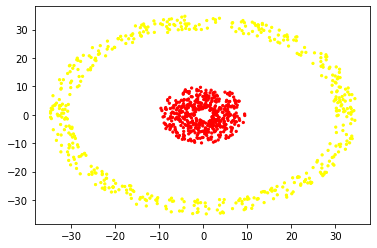

In [3]:
data1 = ring(2, 10)
data2 = ring(30, 35)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "autumn")

## Clusterización

### Ejemplo con K-means

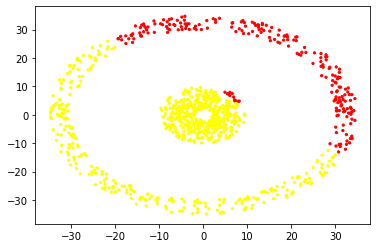

In [4]:
from sklearn.cluster import KMeans

kmeanmodel = KMeans(2).fit(data)
clusters = kmeanmodel.predict(data)
plt.scatter(data[:,0], data[:, 1], c = clusters, s = 5, cmap="autumn")

* La distancia euclídea no es conveniente. 
* Los datos no se han podido separar linealmente.

### Clustering espectral

In [5]:
from sklearn.cluster import SpectralClustering

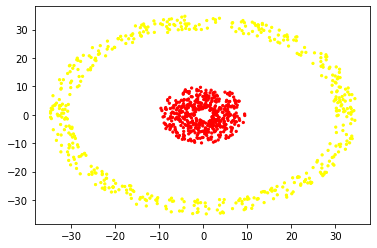

In [6]:
clustspectral = SpectralClustering(2).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c = clustspectral, s = 5, cmap = "autumn")